# <center> Assignment 5 - Convolutional Neural Network
###### Author: Rudraksh Kapil - 177154
In this notebook, I implement a convolutional neural network for classifying images using Keras. We carry out two tasks:
1. Handwritten Digit Classification
2. Handwritten Letter Classification
    


In [20]:
# keras import statements
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# other imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection

### 1. Handwritten digit recognition

###### Get digits from MNIST Dataset 
We also show some images for visualisation. The data is loaded a smaller version of the mnist dataset becuase the actual files are too large to download and reupload during submission.

In [21]:
# Loading data from CSV file
X = pd.read_csv('mnist.csv')
y = X['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Preprocessing and Visualizing the Training Data**

-------------------------
SAMPLE OF TRAINING DATA
-------------------------


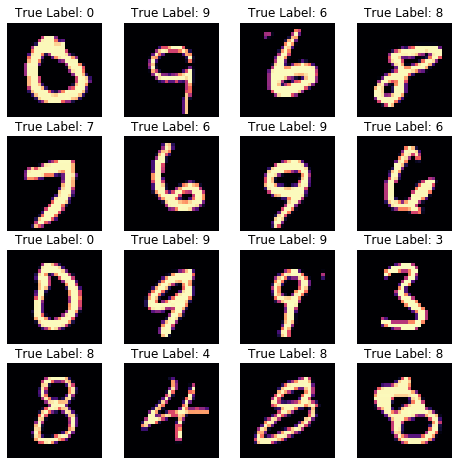

In [22]:
# Storing the labels in a separate vector y_train
y_train = np.array(X_train['label'])

# Dropping the labels column 
X_train = X_train.drop(['label'], axis=1)

# Normalizing the values of the pixels
X_train = X_train / 255

# Converting X_train dataframe to numpy array
X_train = np.array(X_train)

print("-------------------------")
print("SAMPLE OF TRAINING DATA")
print("-------------------------")

# Plotting the data
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    r = np.random.randint(X_train.shape[0])   # Get a random image to show
    plt.title('True Label: '+str(y_train[r])) # Show its label as title
    plt.imshow(X_train[r].reshape(28,28), cmap='magma')    # Plotting the image
plt.show()

# Converting the labels vector into one hot encoded form
oh = np.zeros((y_train.size, y_train.max()+1))
oh[np.arange(y_train.size), y_train] = 1
y_train = np.array(oh)

# Reshaping X_train to the format of the network
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')


**Preprocessing and Visualizing the Testing Data**

-------------------------
SAMPLE OF TESTING DATA
-------------------------


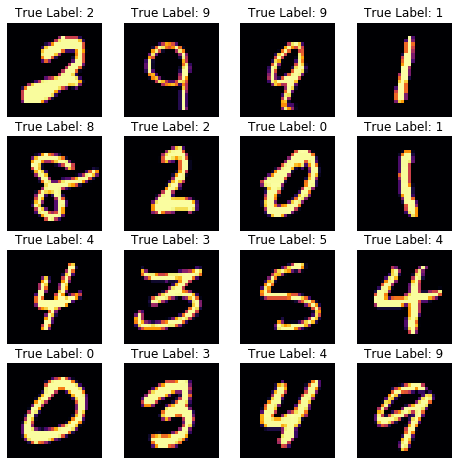

In [23]:
# Storing the labels in a separate vector y_train
y_test = np.array(X_test['label'])

# Dropping the labels column 
X_test = X_test.drop(['label'], axis=1)

# Normalizing the values of the pixels
X_test = X_test/ 255

# Converting X_train dataframe to numpy array
X_test = np.array(X_test)

print("-------------------------")
print("SAMPLE OF TESTING DATA")
print("-------------------------")

# Plotting the data
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    r = np.random.randint(X_test.shape[0])   # Get a random image to show
    plt.title('True Label: '+str(y_test[r])) # Show its label as title
    plt.imshow(X_test[r].reshape(28,28), cmap='inferno')    # Plotting the image
plt.show()

# Converting the labels vector into one hot encoded form
oh = np.zeros((y_test.size, y_test.max()+1))
oh[np.arange(y_test.size), y_test] = 1
y_test = np.array(oh)

# Reshaping X_train to the format of the network
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# number of classes
no_of_label_classes = y_test.shape[1]

**Designing the Convolutional Neural Network**

For the architecture, I use a simple convolutional model due to hardware constraints, but it gives good performance anyway. The model has the following architecture:
- 2D convolutional layer of size 5x5 filters, stride 1 and 32 filters. This is followed by an activation function layer of ReLU.
- Max pooling layer of size 2x2
- Dropout for normalisation with factor = 0.2
- Affine (fully-connected) layer of 128 units, followed by a relu activation.
- Finally, another affine layer with the number of desired output units is used with a softmax activation, since it is a classification task.


I use the adam optimiser and categorical cross entropy loss in the model.


In [25]:
def create_model():
    '''
        Function to create a sequential keras model
    '''
    
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(no_of_label_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
# initialising hyperparameters
iterations = 20
b_size = 16

**Training the Model**

Here I train the model, and for each epoch I also print out the time taken, loss, and accuracy. Likewise, after training, I print out the model summary and all of the weights of the neural network, as required for the assignment. 

In [27]:
# Creating the model
model = create_model()
# Fitting the model
history = model.fit(X_train, y_train,epochs=iterations, batch_size=b_size, verbose=2)

model.summary()
for layer in model.layers: print(layer.get_config(), layer.get_weights())

Epoch 1/20
1759/1759 - 12s - loss: 0.1706 - accuracy: 0.9493
Epoch 2/20
1759/1759 - 11s - loss: 0.0607 - accuracy: 0.9808
Epoch 3/20
1759/1759 - 15s - loss: 0.0434 - accuracy: 0.9853
Epoch 4/20
1759/1759 - 15s - loss: 0.0287 - accuracy: 0.9904
Epoch 5/20
1759/1759 - 15s - loss: 0.0200 - accuracy: 0.9937
Epoch 6/20
1759/1759 - 15s - loss: 0.0183 - accuracy: 0.9939
Epoch 7/20
1759/1759 - 16s - loss: 0.0143 - accuracy: 0.9951
Epoch 8/20
1759/1759 - 11s - loss: 0.0119 - accuracy: 0.9954
Epoch 9/20
1759/1759 - 10s - loss: 0.0106 - accuracy: 0.9960
Epoch 10/20
1759/1759 - 11s - loss: 0.0101 - accuracy: 0.9966
Epoch 11/20
1759/1759 - 11s - loss: 0.0069 - accuracy: 0.9976
Epoch 12/20
1759/1759 - 11s - loss: 0.0067 - accuracy: 0.9978
Epoch 13/20
1759/1759 - 10s - loss: 0.0061 - accuracy: 0.9979
Epoch 14/20
1759/1759 - 11s - loss: 0.0075 - accuracy: 0.9974
Epoch 15/20
1759/1759 - 11s - loss: 0.0071 - accuracy: 0.9978
Epoch 16/20
1759/1759 - 10s - loss: 0.0047 - accuracy: 0.9985
Epoch 17/20
1759/

**Testing the Model**

In [28]:
print("Evaluating on Test Data")
results = model.evaluate(X_test, y_test, batch_size=b_size,verbose=0)
print("Test Accuracy:", results[1])

Evaluating on Test Data
Test Accuracy: 0.9852092266082764


**Visualizing the Performance**

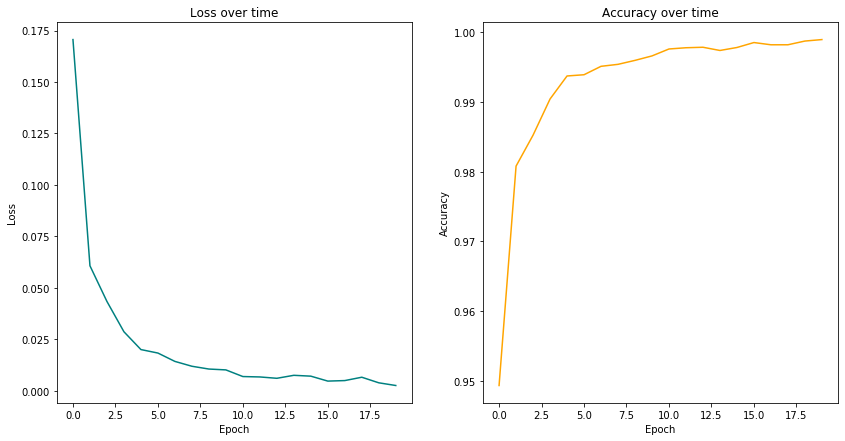

In [31]:
# accuracy vs epochs
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], c='teal')
plt.title('Loss over time')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], c='orange')
plt.title('Accuracy over time')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

### 2. Handwritten character recognition

In [57]:
# Loading data from CSV file
X = pd.read_csv('emnist-letters.csv')
y = X['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Preprocessing and Visualizing the Training Data**

-------------------------
SAMPLE OF TRAINING DATA
-------------------------


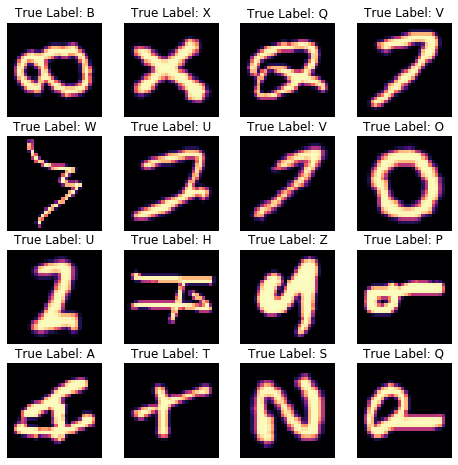

In [58]:
# Storing the labels in a separate vector y_train
y_train = np.array(X_train['label'])

# Dropping the labels column 
X_train = X_train.drop(['label'], axis=1)

# Normalizing the values of the pixels
X_train = X_train / 255

# Converting X_train dataframe to numpy array
X_train = np.array(X_train)

print("-------------------------")
print("SAMPLE OF TRAINING DATA")
print("-------------------------")

# Plotting the data
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    r = np.random.randint(X_train.shape[0])   # Get a random image to show
    plt.title('True Label: '+str(chr(ord('@')+y_train[r]))) # Show its label as title
    plt.imshow(X_train[r].reshape(28,28), cmap='magma')    # Plotting the image
plt.show()

# Converting the labels vector into one hot encoded form
oh = np.zeros((y_train.size, y_train.max()+1))
oh[np.arange(y_train.size), y_train] = 1
y_train = np.array(oh)

# Reshaping X_train to the format of the network
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')


**Preprocessing and Visualizing the Testing Data**

-------------------------
SAMPLE OF TESTING DATA
-------------------------


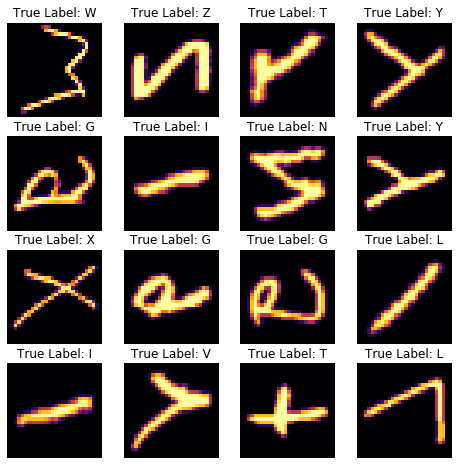

In [59]:
# Storing the labels in a separate vector y_train
y_test = np.array(X_test['label'])

# Dropping the labels column 
X_test = X_test.drop(['label'], axis=1)

# Normalizing the values of the pixels
X_test = X_test/ 255

# Converting X_train dataframe to numpy array
X_test = np.array(X_test)

print("-------------------------")
print("SAMPLE OF TESTING DATA")
print("-------------------------")

# Plotting the data
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    r = np.random.randint(X_test.shape[0])   # Get a random image to show
    plt.title('True Label: '+str(chr(ord('@')+y_test[r]))) # Show its label as title
    plt.imshow(X_test[r].reshape(28,28), cmap='inferno')    # Plotting the image
plt.show()

# Converting the labels vector into one hot encoded form
oh = np.zeros((y_test.size, y_test.max()+1))
oh[np.arange(y_test.size), y_test] = 1
y_test = np.array(oh)

# Reshaping X_train to the format of the network
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# number of class labels
no_of_label_classes = y_test.shape[1]

**Initializing the Hyperparameters**

In [60]:
iterations = 10
b_size = 20

**Training the Model**

Here I train the model, and for each epoch I also print out the time taken, loss, and accuracy. Likewise, after training, I print out the model summary and all of the weights of the neural network, as required for the assignment. 

We use the same network as the first task.

In [66]:
# Creating the model
model = create_model()
model.summary()

# Fitting the model
history = model.fit(X_train, y_train,epochs=iterations,batch_size=b_size, verbose=2)

for layer in model.layers: print(layer.get_config(), layer.get_weights())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_9 (Dense)              (None, 27)                3483      
Total params: 594,267
Trainable params: 594,267
Non-trainable params: 0
________________________________________________

**Testing the Model**

In [67]:
print("Evaluating on Test Data")
results = model.evaluate(X_test, y_test, batch_size=b_size,verbose=0)
print("Test Accuracy:", results[1])

Evaluating on Test Data
Test Accuracy: 0.8246753215789795


**Visualizing the Performance**

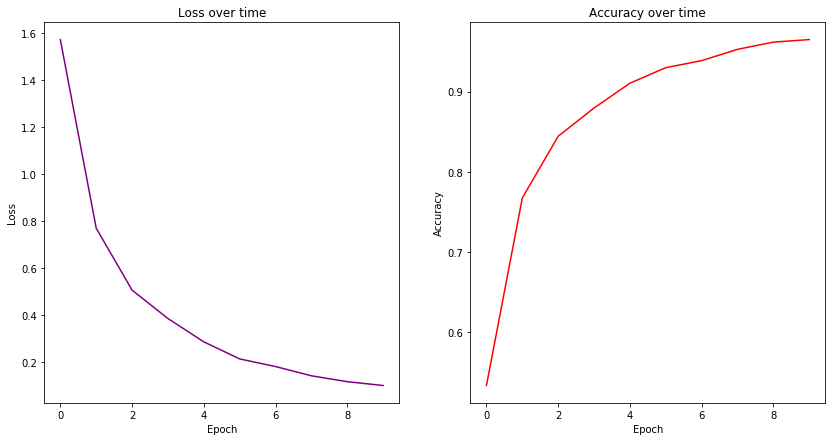

In [69]:
# accuracy vs epochs
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], c='purple')
plt.title('Loss over time')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], c='red')
plt.title('Accuracy over time')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

###### <center> END OF ASSIGNMENT <br><br> Author: Rudraksh Kapil - 177154 <br><br> Thank you for reading :)